# titanic_dataset
Case study on Pre-processing
Do the following on titanic dataset.
1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column
3. Check the basic details of the dataset
4. Fill in all the missing values present in all the columns in the dataset
5. Check and handle outliers in at least 3 columns in the dataset
6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset into python environment

In [2]:
data=pd.read_csv('titanic_dataset.csv')

In [3]:
data.shape

(891, 12)

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 2. Make ‘PassengerId’ as the index column

In [7]:
data.set_index('PassengerId')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# 3.Check the basic details of the dataset3.

In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
data.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Masselmani, Mrs. Fatima",male,347082,G6,S
freq,1,577,7,4,644


In [10]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
data['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
347088      6
3101295     6
           ..
345774      1
345778      1
PC 17590    1
237442      1
347068      1
Name: Ticket, Length: 681, dtype: int64

In [12]:
data['Cabin'].value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
D              3
E101           3
              ..
E36            1
C111           1
C90            1
C103           1
D6             1
Name: Cabin, Length: 147, dtype: int64

In [13]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# 4. Fill in all the missing values present in all the columns in the dataset

In [ ]:
#filling the missing values in the column of 'Age'

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

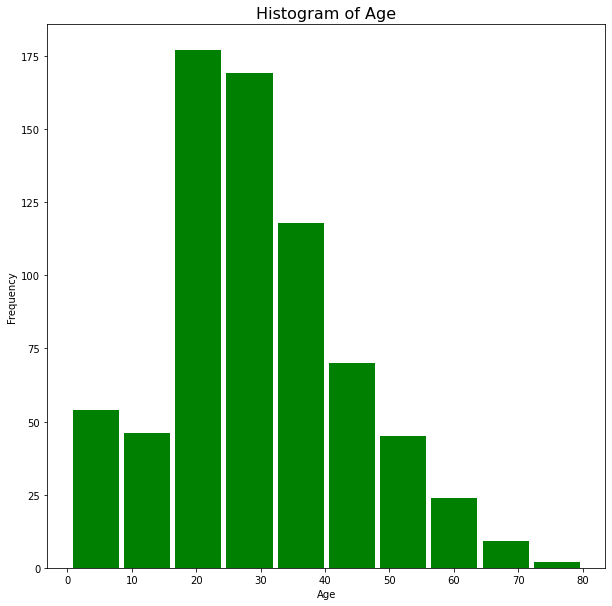

In [15]:
plt.figure(figsize=(10,10))
plt.hist(data['Age'],color='green',rwidth=0.9)
plt.title('Histogram of Age',fontsize=16)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks()
plt.yticks()

In [16]:
data['Age']=data['Age'].fillna(data['Age'].mean())

In [ ]:
#droping the Cabin and Embarked column. because not used for analysis

In [17]:
data.drop('Cabin',axis=1,inplace=True)
data.drop('Embarked',axis=1,inplace=True)

In [18]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

# 5. Check and handle outliers in at least 3 columns in the dataset

In [ ]:
#analyzing the outliers of Age column

Text(0.5, 1.0, 'Box plot of Age')

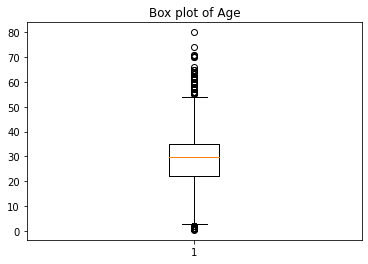

In [19]:
plt.boxplot(data['Age'])
plt.title('Box plot of Age')

In [22]:
Q1=np.percentile(data['Age'],25,interpolation='midpoint')
Q2=np.percentile(data['Age'],50,interpolation='midpoint')
Q3=np.percentile(data['Age'],75,interpolation='midpoint')

In [23]:
print(Q1)
print(Q2)
print(Q3)

22.0
29.69911764705882
35.0


In [24]:
data['Age'].median()

29.69911764705882

In [25]:
IQR=Q3-Q1

In [26]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [27]:
print(low_lim)
print(up_lim)

2.5
54.5


In [28]:
outlier=[]
for x in data['Age']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)

In [29]:
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [30]:
ind1=data['Age']>up_lim
data.loc[ind1].index

Int64Index([ 11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252,
            268, 275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 493, 545,
            555, 570, 587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772,
            829, 851, 879],
           dtype='int64')

In [31]:
data.drop([11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252,
            268, 275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 493, 545,
            555, 570, 587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772,
            829, 851, 879],inplace=True)

Text(0.5, 1.0, 'Box plot of Age')

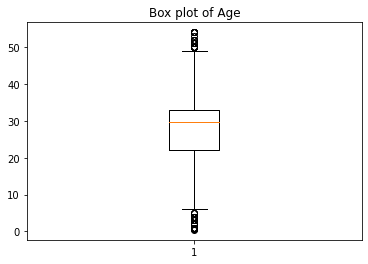

In [32]:
plt.boxplot(data['Age'])
plt.title('Box plot of Age')

In [33]:
ind2=data['Age']<low_lim
data.loc[ind2].index

Int64Index([  7,  16,  78, 119, 164, 172, 183, 205, 297, 305, 340, 381, 386,
            469, 479, 530, 642, 644, 755, 788, 803, 824, 827, 831],
           dtype='int64')

In [34]:
data.drop([7,  16,  78, 119, 164, 172, 183, 205, 297, 305, 340, 381, 386,
            469, 479, 530, 642, 644, 755, 788, 803, 824, 827, 831],inplace=True)

Text(0.5, 1.0, 'Box plot of Age')

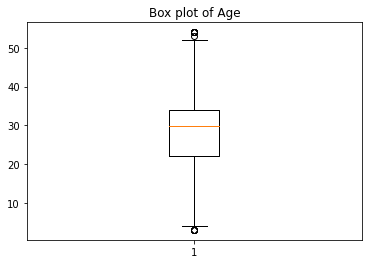

In [35]:
plt.boxplot(data['Age'])
plt.title('Box plot of Age')

Text(0.5, 1.0, 'Box plot of Pclass')

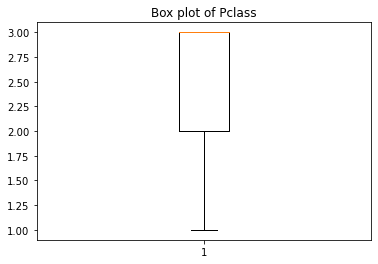

In [20]:
plt.boxplot(data['Pclass'])
plt.title('Box plot of Pclass')

Text(0.5, 1.0, 'Box plot of Survived')

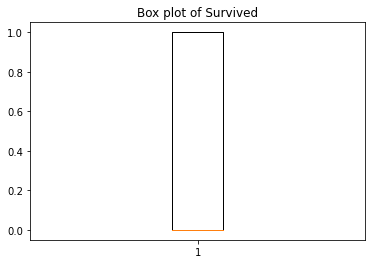

In [58]:
plt.boxplot(data['Survived'])
plt.title('Box plot of Survived')

In [68]:
#there is no outliers in Pclass and survived column. 

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [65]:
from sklearn import preprocessing

In [59]:
from sklearn.preprocessing import MinMaxScaler

In [62]:
X=data.drop('Survived',axis=1)

In [63]:
X.describe()

,index,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,446.369697,447.369697,2.341818,28.879689,0.507879,0.357576,31.483615
std,257.088865,257.088865,0.824096,10.182710,1.090670,0.798599,49.956429
min,0.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,225.000000,226.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,444.000000,445.000000,3.000000,29.699118,0.000000,0.000000,13.416700
75%,670.000000,671.000000,3.000000,34.000000,1.000000,0.000000,30.070800
max,890.000000,891.000000,3.000000,54.000000,8.000000,6.000000,512.329200


In [66]:
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))